In [3]:
#!pip install micromlgen

In [3]:
# Random Forest Classifiers
# 10/24/2022


from micromlgen import port
#from sklearn.tree import export_text
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# If you're working in Jupyter Notebook, include the following so that plots will display:
%matplotlib inline

# read data from csv file
data = pd.read_excel('unprocessed_data.xlsx')


#print(data)
X = data.iloc[:,3:32]
y = data.iloc[:,32]
#print("X=",X)
#print("y=",y)
X_names = X.columns
y_name = y.name
# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1, stratify = y)


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [3]:
def plot_result(y_test, y_pred_test):

    # View accuracy score
    accuracy_score(y_test, y_pred_test)

    # View confusion matrix for test data and predictions
    confusion_matrix(y_test, y_pred_test)

    # Get and reshape confusion matrix data
    matrix = confusion_matrix(y_test, y_pred_test)

    accuracy = float(matrix.diagonal().sum())/len(y_test)
    print('model accuracy is:',accuracy*100,'%')

    matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    # Build the plot
    plt.figure(figsize=(16,4))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10},
                cmap=plt.cm.Greens, linewidths=0.2)

    # Add labels to the plot
    class_names = ['40ccm', '400ccm', '500ccm']
    tick_marks = np.arange(len(class_names))
    tick_marks2 = tick_marks + 0.5
    plt.xticks(tick_marks, class_names, rotation=25)
    plt.yticks(tick_marks2, class_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix for Random Forest Model')
    plt.show()

    # with open('RandomForest.h', 'w') as file:
    #     file.write(port(forest))

In [4]:

# Instantiate and fit the RandomForestClassifier
forest = RandomForestClassifier(max_depth=2)
forest.fit(X_train, y_train)

# Make predictions for the test set
y_pred_test = forest.predict(X_test)


model accuracy is: 84.04493185689948 %


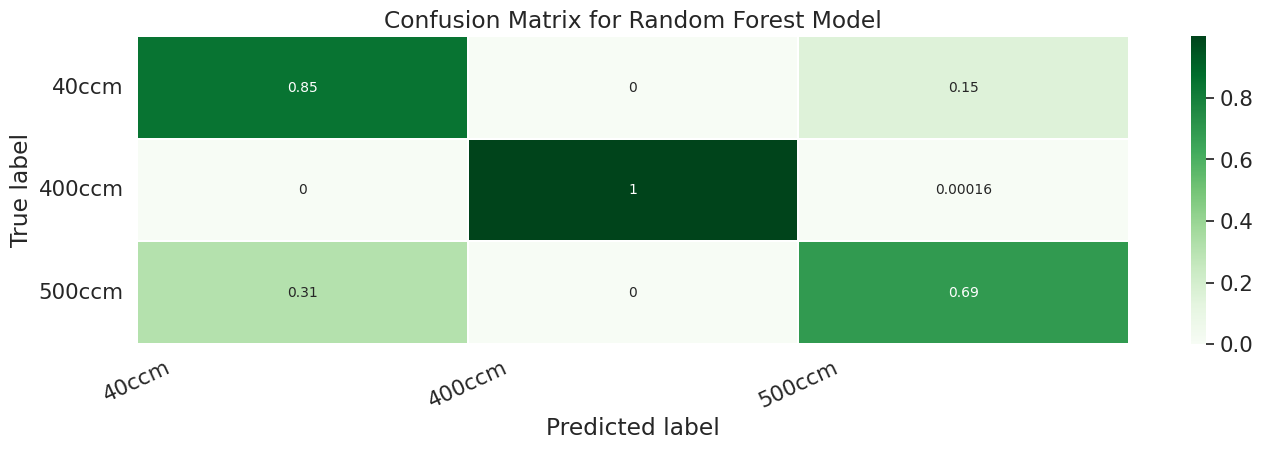

In [5]:
plot_result(y_test, y_pred_test)

model accuracy is: 86.46720613287904 %


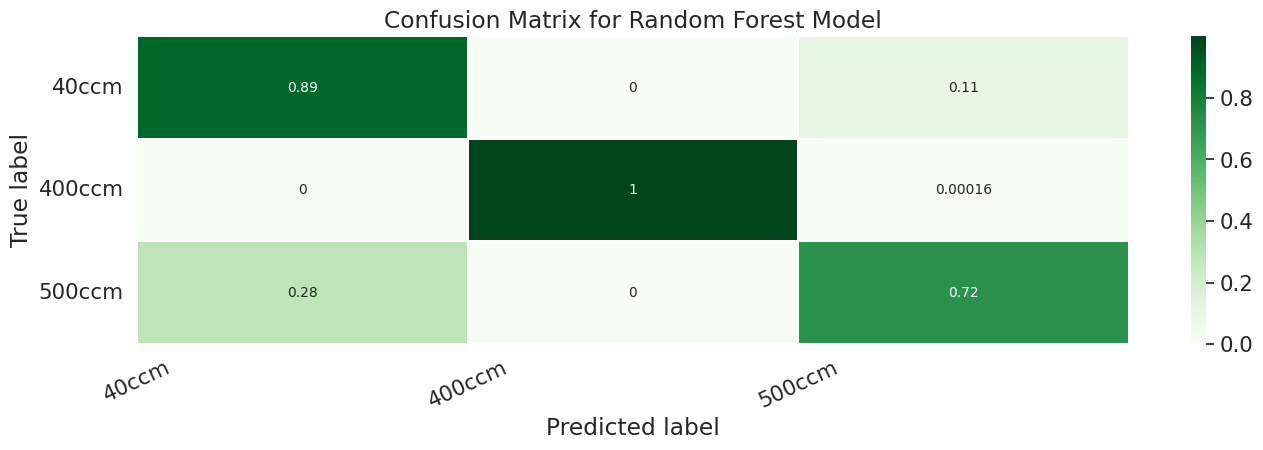

In [6]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate and fit the RandomForestClassifier
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train, y_train)

# Make predictions for the test set
y_pred_test = dt.predict(X_test)
plot_result(y_test, y_pred_test)

In [7]:
dt.get_depth()

6

In [8]:
from sklearn.tree import export_text
r = export_text(dt)
print(r)

|--- feature_28 <= -1.20
|   |--- class: 1
|--- feature_28 >  -1.20
|   |--- feature_10 <= -0.00
|   |   |--- feature_11 <= -0.00
|   |   |   |--- feature_10 <= -0.00
|   |   |   |   |--- feature_23 <= -0.00
|   |   |   |   |   |--- feature_4 <= -0.01
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_4 >  -0.01
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_23 >  -0.00
|   |   |   |   |   |--- feature_20 <= 0.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_20 >  0.00
|   |   |   |   |   |   |--- class: 2
|   |   |   |--- feature_10 >  -0.00
|   |   |   |   |--- feature_7 <= -0.00
|   |   |   |   |   |--- feature_0 <= -0.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  -0.00
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_7 >  -0.00
|   |   |   |   |   |--- feature_11 <= -0.00
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_11 >  -0.00
|   |   |   | 

In [42]:
with open('DecisionTree.h', 'w') as file:
    file.write(port(dt))

In [15]:
type(X_test)

pandas.core.frame.DataFrame

In [16]:
X_test_pred = X_test.copy()

In [18]:
X_test_pred["target"] = y_test

In [28]:
X_test_pred.head(1)

,0.001,-0.003,-0.003.1,-0.003.2,-0.005,-0.079,-0.001,-0.023,-0.001.1,0,...,0.5,0.6,0.7,0.001.1,0.001.2,0.001.3,0.8,0.9,0.10,target
25556,-0.001,-0.001,0.0,0.0,0.0,0.0,0.0,0.001,0.0,-0.001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [31]:
X_test_pred.to_csv("test_output.csv", index=False,header=False)